In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Collapse
A bubble initially at eqb with ambient pressure $p_{\infty, 0}$ is suddenly appplied with a huge pressure pertubation $\Delta p$
$$\forall ~t>0, \quad p_\infty(t) = p_{\infty, 0} + \Delta p ~~\text{with} ~~\Delta p >> p_{\infty, 0}$$


In [3]:
#Liquid properties
rho = 1e3
mu = 8.9e-4
#mu = 8.9e-8
sigma=0.072

#Ambient COnditions
p_atm = 1e5

#Polytropic coeff
gamma=1.33

Fixed these parameters fixed for air-water at ambient

$$p_{\infty,0} = 1\times 10^5 Pa$$,

$$\rho_L = 1\times 10^{3} kgm^{-3}$$,

$$\mu_L=8.9\times 10^{-4} Ns/m^{2}$$,

$$\sigma = 0.072 N/m$$,

$$\gamma = 1.33$$

These parameters are chosen

$$R_0 = 2\times 10^{-6} m $$

$$\frac{\omega_0}{\omega} = 1.2 $$

# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## Non dimensional numbers

(Use characteristic velocity scale as collapse velocity 
 $U_c = \sqrt{\frac{\Delta p}{\rho_L} }$ and length  scale $R_0$ and time scale $R_0/U$)

(1) ratio of  new ambient pressure to  Pressure Perturbation
$$
    p^* = \frac{p_{\infty}}{\Delta p} = \frac{p_{\infty, 0} + \Delta p}{\Delta p}
$$
In violent collapse $p^* >> 1$

(2) Weber Number, $We$
$$
        We = \frac{\Delta p R_0}{\sigma}
$$
(5) Reynolds Number
$$
    Re = \frac{R_0 \sqrt{\Delta p ~ \rho_L}}{\mu_L} 
$$
(6) Non-dim time
    $$
        t^* = {t}{U/R_0} = \sqrt{ \frac{\Delta p}{R_0} } \frac{1}{R_0} ~ t
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       u^*{t^*} = \frac{d R^*}{d t^*} =  \sqrt{\frac{\rho_L}{\Delta p}} \frac{d R}{d t}
    $$
 We alse have
    $$
       \frac{d R}{d t} =  \sqrt{\frac{\Delta p} {\rho_L}} \frac{d R^*}{d t^*} ~;\quad~
       \frac{d^2 R}{d t^2} =  \frac{1}{R_0} \frac{\Delta p} {\rho_L}  \frac{d^2 R^*}{d {t^*}^2} ~;\quad~
       \frac{p_{\infty, 0}}{\Delta p} = p^* - 1
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + \frac{4}{Re} \frac{U^*}{R^*} + \frac{2}{We} \frac{1}{R^*} =
     \bigg( p^* - 1 + \frac{1}{We} \bigg) \left( \frac{1}{R^*} \right)^{3k} - p^* 
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left[
    \bigg( p^* - 1 + \frac{1}{We} \bigg) \left( \frac{1}{R^*} \right)^{3k} - p^* -  \frac{3}{2} {U^*}^2 - \frac{4}{Re} \frac{U^*}{R^*} - \frac{2}{We} \frac{1}{R^*}
\right]
\end{bmatrix}
$$

In the above equation
$$  p_G(t^*) = \left[ \bigg( p^* - 1 + \frac{1}{We} \bigg) \left( \frac{1}{R^*}\right)^{3k} \right] \Delta p  $$
$$  p_\infty (t^*) =  p^* ~ \Delta p$$


## Integration of R-P (Non-dim)

In [1]:
#partial pressure of air as a function of R
def p_gas(Rstar):
    pg0 = pstar - 1 + 1/We;
    return pg0*np.power(Rstar, -3*gamma) 

#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( p_gas(Rstar) - pstar - 1.5*Ustar**2 - 4*Ustar/(Re * Rstar) - 2/(We*Rstar) )/Rstar
    return (Ustar, dfdt)

## Compare bubble response (RP vs Linear Stability Analaysis)

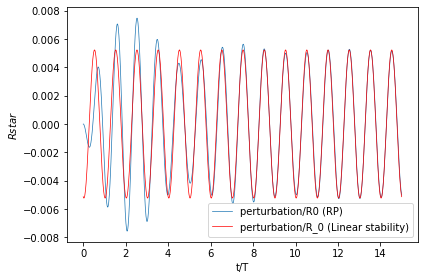

In [293]:
tstarsample = (omega0/omegastar)*tsample
R_RP = odeint(RP, [1, 0], tstarsample)
Ustarsample = R_RP[:,1]
Rstarsample = R_RP[:,0]

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$Rstar$")
ax1.plot(tstarsample/(2*np.pi), Rstarsample-1, linewidth = 0.7, label = "perturbation/R0 (RP)")
ax1.plot(tstarsample/(2*np.pi), perturbation, linewidth = 0.7, label = "perturbation/R_0 (Linear stability)", color= 'red')

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


In [294]:
def p_infty (t):
    p_it = p_atm * ( 1 +  pstar * np.cos(omega0*t/omegastar) )
    return p_it

#partial pressure of air as a function of R
def p_gas(R):
    p_g = p_atm*(1+1/wstar)*np.power(R_0/R, 3*k);
    return p_g

#d/dt (x) = equation(x,t)
def RP(x, t):
    (R,u) = x;
    udot = (p_gas(R) - p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)

## Compare bubble response (RP vs Linear Stability Analaysis)

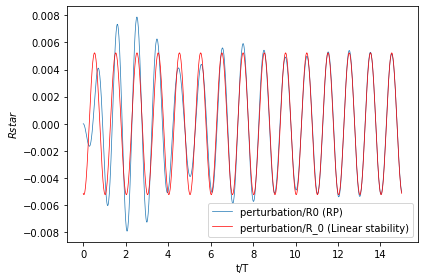

In [295]:
R_RP = odeint(RP, [R_0, 0], tsample)
Usample = R_RP[:,1]
Rsample = R_RP[:,0]

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$Rstar$")
omega=omega0/omegastar
ax1.plot(tsample/(2*np.pi/omega), Rsample/R_0-1, linewidth = 0.7, label = "perturbation/R0 (RP)")
ax1.plot(tsample/(2*np.pi/omega), perturbation, linewidth = 0.7, label = "perturbation/R_0 (Linear stability)", color= 'red')

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Frequency response (Linear approximation)

Amplitude of  (non-dimensionlised) radial perturbation is given by
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* )}^2        \right)}}
$$
And the maximum happens for the resonance frequency 
$$
    \omega_R = \omega_0 \sqrt{ 1 - 2{\zeta}^2 }    \quad\text{where}\quad  \zeta = \frac{\zeta^*}{\omega^*} 
    =  \frac{2\mu_L}{\rho_L R_0^2 \omega_0}
$$
and $max{\epsilon}$ is 
$$
\epsilon_0 \bigg|_{\omega = \omega_R} =
   \frac{p_A}{4\mu} \frac{1}{\sqrt{\omega_p^2
  + \frac{1}{4} \left( \frac{4\mu}{\rho_L R_0^2}  \right)^2}}
  = \frac{p_A}{4\mu} \frac{1}{\sqrt{\omega_0^2
  -  \frac{1}{4} \left( \frac{4\mu}{\rho_L R_0^2}  \right)^2}}
$$

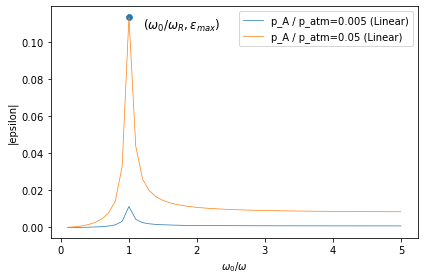

In [314]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$\omega_0/\omega$")
ax1.set_ylabel(r"|epsilon|")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            phi, eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)         
        _label = "p_A / p_atm="+str(pstar)+" (Linear)"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)


omegastar_space=0.1*np.ones(50)+0.1*np.array(range(50))
pstar_space=[0.005, 0.05]

init_parametric_space(omega_space, pstar_space)

#Resonance Frequency
omegaR = omega0*np.sqrt(1-2* (2*mu/(rho* R_0**2 * omega0))**2 )
omegaRstar = omega0/omegaR;

#Resonance amplitude.(both expr are same)
epsmax = 0.05*p_atm/(4*mu*np.sqrt(omega0**2 - 0.25*(4*mu/rho/R_0**2)**2 ))
epsmax = 0.05*p_atm/(4*mu*np.sqrt(omegaR**2 + 0.25*(4*mu/rho/R_0**2)**2 ))

plt.text(omegastar,epsmax, r'($\omega_0/\omega_R, \epsilon_{max}$)',ha='left', va='top', fontsize=12)
ax1.scatter([omegaRstar], [epsmax], linewidth = 0.7)


ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()
